In [1]:
# Importing necessary modules.

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt         
import sys
import pickle
import librosa
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from sklearn.preprocessing import normalize


In [2]:
# Choosing one file from our dataset, that we already have as a numpy array.

a = np.load('/Users/DELL/Updated_binder_enviro/all-samples/cello/cello_A2_1_forte_arco-normal.npy')
sr = 44100    
print(a)
print(a.shape)

[0. 0. 0. ... 0. 0. 0.]
(58752,)


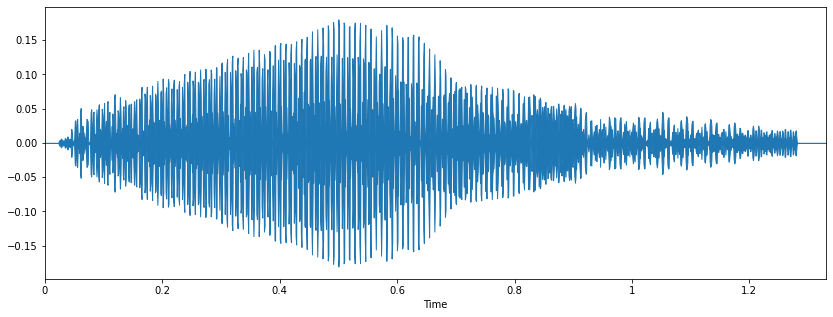

In [3]:
# Plotting the original audio file

plt.figure(figsize=(14, 5))     
librosa.display.waveplot(a, sr=sr);


# Playing the original audio file

ipd.Audio(data=a,rate=sr,autoplay=True)      #understood that we are playing back the original file here

In [4]:
# Pre-processing of the audio file 


norma = a/(np.abs(a).max())   # Here we are doing Peak- normalization of the audio file
print(type(norma))


<class 'numpy.ndarray'>


In [7]:
X_initi= norma[:58751]    # test data
Y_initi=norma[1:58752]   # target data
print(X_initi.shape)    
print(Y_initi.shape)
print(type(X_initi))

(58751,)
(58751,)
<class 'numpy.ndarray'>


In [8]:
# Changing the dimensions and converting to Tensor
c = X_initi
c = np.expand_dims(c,axis=0)   
print(c.shape)
c=np.expand_dims(c,axis=0)
print(c.shape)

X =torch.from_numpy(c)

d = Y_initi
d = np.expand_dims(d,axis=0)
print(d.shape)
d=np.expand_dims(d,axis=0)
print(d.shape)

Y = torch.from_numpy(d)

print(X.shape)
print(Y.shape)

(1, 58751)
(1, 1, 58751)
(1, 58751)
(1, 1, 58751)
torch.Size([1, 1, 58751])
torch.Size([1, 1, 58751])


In [9]:
L=13 #filter length       
dilation=1 #Dilation: upsampling the filter impulse response, new filter length: (L-1)*dilation+1

In [10]:
# Defining of the PyTorch model

class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # defining network layers
        self.layer1 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=L, stride=1, dilation=dilation, padding=6, bias=False)
        
        
    def forward(self, x):
        # define forward pass          
        x = self.layer1(x)
        return x
print("Generate Model:")
model = MyNetwork()
print(model)        #dilation*(L-1)

Generate Model:
MyNetwork(
  (layer1): Conv1d(1, 1, kernel_size=(13,), stride=(1,), padding=(6,), bias=False)
)


In [11]:
# Definition of the loss function and the optimizer

n_epochs = 10000
learning_rate = 1e-4
print("Def. loss function:")   

loss_fn = nn.MSELoss()       # Defining loss function as Mean Square Error
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Def. loss function:


In [12]:
# Training of the model

for epoch in range(10000):
    Ypred=model(X)
    loss=loss_fn(Ypred, Y)    # Calculation of Mean Square Error       
    optimizer.zero_grad()     # Setting the gradient to zero for every cycle
    loss.backward()         # Calculation of gradient
    optimizer.step()    # Using optimizer.step to update the values
    if epoch%1000==0:
        print(epoch, loss.item())

0 0.08320469409227371
1000 0.002417250769212842
2000 9.364441211801022e-05
3000 8.861257811076939e-05
4000 8.460694516543299e-05
5000 8.050854376051575e-05
6000 7.682768773520365e-05
7000 7.309827924473211e-05
8000 6.803607539040968e-05
9000 6.056778147467412e-05


In [13]:
# Predictions after the model is trained

predictions=model(X)   
print(predictions)
print(predictions.shape)  # Checking its shape to see the dimensions

tensor([[[0., 0., 0.,  ..., 0., 0., 0.]]], grad_fn=<SqueezeBackward1>)
torch.Size([1, 1, 58751])


In [14]:
# Computation of the prediction errors

#mean squared predicton error:

err= sum((predictions[0,0,:]-Y[0,0,:])**2)/max(Y.shape)
print("mean squared prediction error=", err)

print(err.shape)



mean squared prediction error= tensor(5.0136e-05, grad_fn=<DivBackward0>)
torch.Size([])


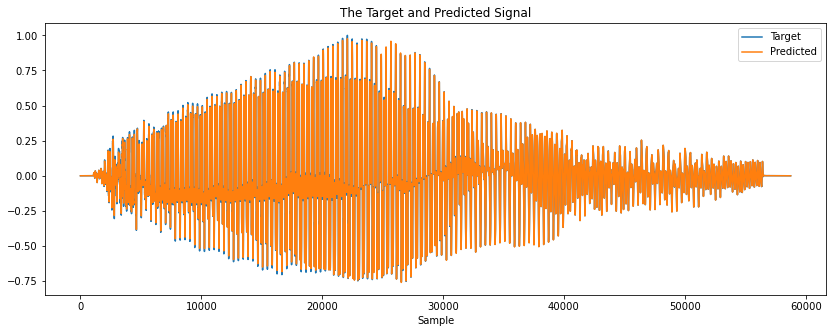

In [15]:
# Plots of the Predictions and the target 

plt.figure(figsize=(14, 5))    
plt.plot(np.array(Y[0,0,:]),)
plt.plot(predictions.detach().numpy()[0,0,:])
plt.legend(('Target','Predicted'))
plt.title('The Target and Predicted Signal')
plt.xlabel('Sample');


In [17]:
# Saving the model

torch.save({'epoch': epoch,        
       'model_state_dict': model.state_dict(),
       'optimizer_state_dict': optimizer.state_dict()}, "linpredweights.torch")